# SVM Demo Cancer Classifier
Dataset (c) UCI Machine Learning Repository
https://cml.ics.uci.edu/MLRepository.html

In [1]:
#import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read csv cell_samples.csv
cell_df = pd.read_csv('cell_samples.csv')

In [3]:
#copy the first 200 row from class 4 to new variable. Give the variable name 'malignant_df'
malignant_df = cell_df[cell_df['Class'] == 4]

#copy the first 200 row from class benign to new variable. Give the variable name 'benign'
benign_df = cell_df[cell_df['Class'] == 2]

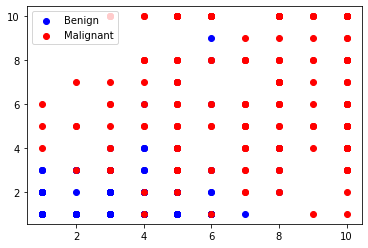

In [4]:
#plot a scatter plot of benign_df, x = 'Clump', y = 'UnifSize'
plt.scatter(benign_df['Clump'], benign_df['UnifSize'], marker='o', c='b')

#plot a scatter plot of malignant_df, x = 'Clump', y = 'UnifSize'
plt.scatter(malignant_df['Clump'], malignant_df['UnifSize'], marker='o', c='r')

#create a legend on the plot
plt.legend(['Benign', 'Malignant'])

In [5]:
#convert 'BareNuc' to numeric using pd.to_numeric
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
#convert 'BareNuc' to integer
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
#datatype of cell_df
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [6]:
#show cell_df columns
cell_df.columns

#create a new array named 'feature_df' from cell_df but without 'ID' and 'Class'
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

#show feature_df columns
feature_df.columns

# create new numpy array 'x' from feature_df
x = np.asarray(feature_df)

#move 'Class' column from cell_df to new variable 'y'
y = np.asarray(cell_df['Class'])

In [7]:
'''
Split 'cell_df' into training and test sets
Train (X,y) with 80% of the data
Test (X,y) with 20% of the data
'''

#import train_test_split
from sklearn.model_selection import train_test_split

#split 'cell_df' into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

#check all shapes of X_train, X_test, y_train, y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(546, 9) (137, 9) (546,) (137,)


In [8]:
#import svm
from sklearn import svm

#create a svm classifier, kernel = linear; gamma = auto; c= 2
clf = svm.SVC(kernel='linear', gamma='auto', C=2)

#fit the classifier to the training data
clf.fit(X_train, y_train)

#predict the labels of the test data
y_pred = clf.predict(X_test)

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



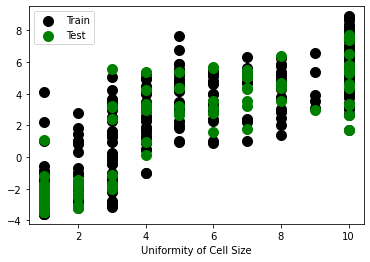

In [10]:
#import classification_report
from sklearn.metrics import classification_report

#print the classification report
print(classification_report(y_test, y_pred))

#plot the classifier line among all dataset
plt.scatter(X_train[:, 1], clf.decision_function(X_train), c='k', marker='o', s=100, label='Train')
plt.scatter(X_test[:, 1], clf.decision_function(X_test), c='g', marker='o', s=100, label='Test')
plt.xlabel('Uniformity of Cell Size')
plt.legend()
plt.show()
